<a href="https://colab.research.google.com/github/SubramanyaMaiya/MulticlasssTextClassificationUsingAutoMl/blob/main/Text_Classification_With_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy

In [2]:
!pip install gensim

In [3]:
# import pandas as pd
# import spacy
# nlp = spacy.load("en_core_web_sm")

In [4]:
import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud
from nltk.stem import PorterStemmer

import re
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import word2vec

In [5]:
consumer_complaint = pd.read_csv('https://github.com/srivatsan88/YouTubeLI/blob/master/dataset/consumer_compliants.zip?raw=true',compression='zip',sep=',',quotechar='"')
consumer_complaint.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,4/3/2020,Vehicle loan or lease,Loan,Getting a loan or lease,Fraudulent loan,This auto loan was opened on XX/XX/2020 in XXX...,Company has responded to the consumer and the ...,TRUIST FINANCIAL CORPORATION,PA,None,None,Consent provided,Web,4/3/2020,Closed with explanation,Yes,NaN,3591341
1,3/12/2020,Debt collection,Payday loan debt,Attempts to collect debt not owed,Debt is not yours,In XXXX of 2019 I noticed a debt for {$620.00}...,None,CURO Intermediate Holdings,CO,806XX,None,Consent provided,Web,3/12/2020,Closed with explanation,Yes,NaN,3564184
2,2/6/2020,Vehicle loan or lease,Loan,Getting a loan or lease,Credit denial,"As stated from Capital One, XXXX XX/XX/XXXX an...",None,CAPITAL ONE FINANCIAL CORPORATION,OH,430XX,None,Consent provided,Web,2/6/2020,Closed with explanation,Yes,NaN,3521949
3,3/6/2020,Checking or savings account,Savings account,Managing an account,Banking errors,"Please see CFPB case XXXX. \n\nCapital One, in...",None,CAPITAL ONE FINANCIAL CORPORATION,CA,None,None,Consent provided,Web,3/6/2020,Closed with explanation,Yes,NaN,3556237
4,2/14/2020,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,This debt was incurred due to medical malpract...,Company believes it acted appropriately as aut...,"Merchants and Professional Bureau, Inc.",OH,432XX,None,Consent provided,Web,2/14/2020,Closed with explanation,Yes,NaN,3531704


In [6]:
consumer_complaint = consumer_complaint[['Product', 'Consumer complaint narrative', 'Company']]
consumer_complaint.head()

,Product,Consumer complaint narrative,Company
0,Vehicle loan or lease,This auto loan was opened on XX/XX/2020 in XXX...,TRUIST FINANCIAL CORPORATION
1,Debt collection,In XXXX of 2019 I noticed a debt for {$620.00}...,CURO Intermediate Holdings
2,Vehicle loan or lease,"As stated from Capital One, XXXX XX/XX/XXXX an...",CAPITAL ONE FINANCIAL CORPORATION
3,Checking or savings account,"Please see CFPB case XXXX. \n\nCapital One, in...",CAPITAL ONE FINANCIAL CORPORATION
4,Debt collection,This debt was incurred due to medical malpract...,"Merchants and Professional Bureau, Inc."


In [7]:
df = consumer_complaint.copy()
df['Product'].value_counts()

Debt collection                21772
Credit card or prepaid card    13193
Mortgage                        9799
Checking or savings account     7003
Student loan                    2950
Vehicle loan or lease           2736
Name: Product, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


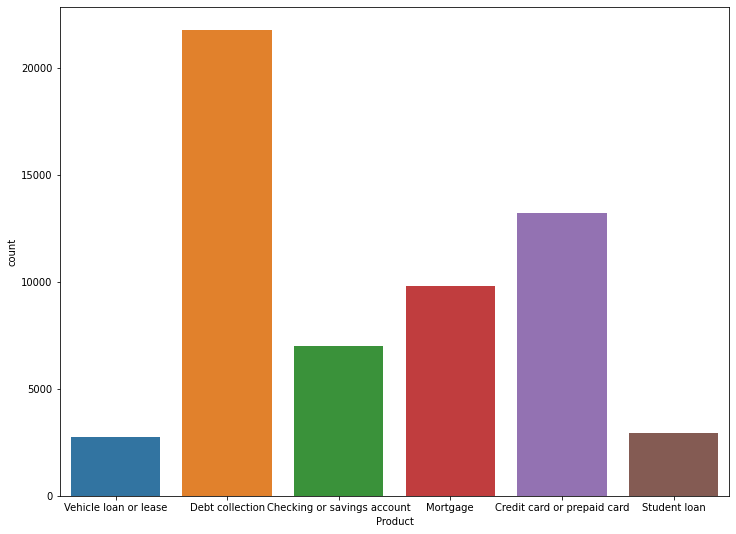

In [9]:
plt.figure(figsize=(12,9))
sns.countplot(df['Product'])

In [10]:
## Data is highly imbalanced.

In [11]:
df.rename(columns={'Consumer complaint narrative':'Complaint'},inplace=True)
df

,Product,Complaint,Company
0,Vehicle loan or lease,This auto loan was opened on XX/XX/2020 in XXX...,TRUIST FINANCIAL CORPORATION
1,Debt collection,In XXXX of 2019 I noticed a debt for {$620.00}...,CURO Intermediate Holdings
2,Vehicle loan or lease,"As stated from Capital One, XXXX XX/XX/XXXX an...",CAPITAL ONE FINANCIAL CORPORATION
3,Checking or savings account,"Please see CFPB case XXXX. \n\nCapital One, in...",CAPITAL ONE FINANCIAL CORPORATION
4,Debt collection,This debt was incurred due to medical malpract...,"Merchants and Professional Bureau, Inc."
...,...,...,...
57448,Student loan,I am attempting to make a payment toward my st...,"Nelnet, Inc."
57449,Debt collection,Received letter for {$480.00}. Original credit...,"The Receivable Management Services LLC, New Yo..."
57450,Debt collection,entire time 10 years until XX/XX/2020. XXXX ma...,"Convergent Resources, Inc."
57451,Checking or savings account,I am a customer with Wells Fargo Bank. Recentl...,WELLS FARGO & COMPANY


In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

stopwords = set(nltk.corpus.stopwords.words('english'))

In [15]:
df.loc[0,'Complaint'].lower()

"this auto loan was opened on xx/xx/2020 in xxxx, nc with bb & t in my name. i have never been to north carolina and i have never been a resident. i have filed a dispute twice through my credit bureaus but both times bb & t has claimed that this is an accurate loan. which i wasn't aware of until today. i have tried to contact bb & t multiple times but i have never gotten through to a live person. i do n't drive and i have never owned a car before. i didn't have any knowledge of this account until i checked xxxxxxxx xxxx  and noticed it. i've tried twice to dispute it. additionally i never received any bills or information about this account. this is my last resort in trying to remove this fraudulent loan off of my account."

In [16]:
from nltk.stem import 	WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [17]:
def clean_text_nltk(txt):
  txt = txt.lower()
  words = [wordnet_lemmatizer.lemmatize(re.sub('\d+','', word)) for word in nltk.word_tokenize(txt) if (word not in stopwords and len(word) >3 and len(word.strip('Xx/')) >2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3)]
  return ' '.join(words)
  
  
# if word not in stopwords and len(word) >3 and len(word.strip('Xx/')) >2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3:
# print(stemmer.stem(word), word)

In [20]:
# re.sub('\d+','', '2110asdad')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [21]:
df['Complaint'] = df['Complaint'].apply(clean_text_nltk)

In [22]:
# def clean_text(txt):
#     doc = nlp(txt)
#     text = [token.lemma_ for token in doc if (len(token) > 3 and len(str(token).strip('Xx/')) > 2 and len(re.sub('\d+','', str(token).strip('Xx/'))) and token.is_stop == False)]
#     return text
# #     return ' '.join(text)

In [23]:
# import re
# df['Complaint'] = df['Complaint'].apply(clean_text)

In [24]:
df.head()

,Product,Complaint,Company
0,Vehicle loan or lease,auto loan opened name never north carolina nev...,TRUIST FINANCIAL CORPORATION
1,Debt collection,noticed debt credit believed mine thought spee...,CURO Intermediate Holdings
2,Vehicle loan or lease,stated capital wife went several dealership re...,CAPITAL ONE FINANCIAL CORPORATION
3,Checking or savings account,please cfpb case capital letter provided attac...,CAPITAL ONE FINANCIAL CORPORATION
4,Debt collection,debt incurred medical malpractice asked doctor...,"Merchants and Professional Bureau, Inc."


In [25]:
df['Product'].unique()

array(['Vehicle loan or lease', 'Debt collection',
       'Checking or savings account', 'Mortgage',
       'Credit card or prepaid card', 'Student loan'], dtype=object)

In [26]:
product_label = {'Vehicle loan or lease': 5, 'Debt collection': 0, 'Checking or savings account': 3, 'Mortgage': 2, 'Credit card or prepaid card': 1, 'Student loan': 4}

In [27]:
df['Product'] = df['Product'].map(product_label)
df.head()

,Product,Complaint,Company
0,5,auto loan opened name never north carolina nev...,TRUIST FINANCIAL CORPORATION
1,0,noticed debt credit believed mine thought spee...,CURO Intermediate Holdings
2,5,stated capital wife went several dealership re...,CAPITAL ONE FINANCIAL CORPORATION
3,3,please cfpb case capital letter provided attac...,CAPITAL ONE FINANCIAL CORPORATION
4,0,debt incurred medical malpractice asked doctor...,"Merchants and Professional Bureau, Inc."


In [28]:
 ## Lets see the most frequent words in each classes

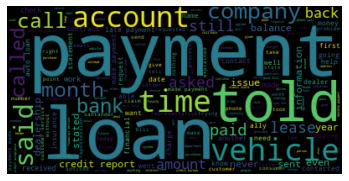

In [29]:
txts = df[df['Product'] == 5]['Complaint'].tolist()
wordcloud = WordCloud().generate(' '.join(txts))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Word cloud for Vehicle loan or lease is: 


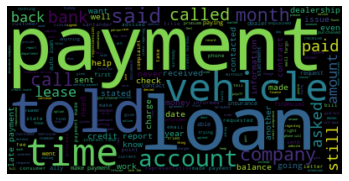

Word cloud for Debt collection is: 


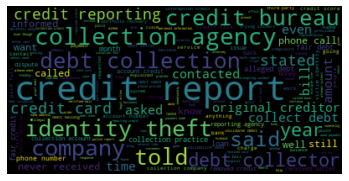

Word cloud for Checking or savings account is: 


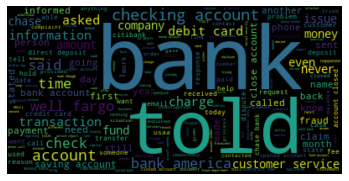

Word cloud for Mortgage is: 


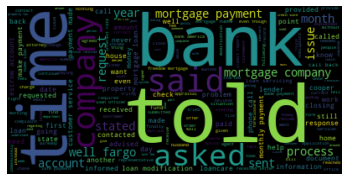

Word cloud for Credit card or prepaid card is: 


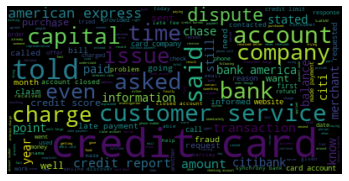

Word cloud for Student loan is: 


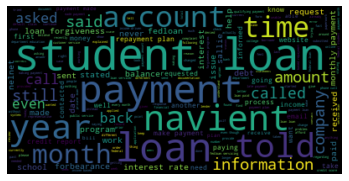

In [30]:
for i,v in product_label.items():
  print('Word cloud for {} is: '.format(i))

  txts = df[df['Product'] == v]['Complaint'].tolist()
  wordcloud = WordCloud().generate(' '.join(txts))

  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [31]:
X = df[['Complaint']]
y = df['Product']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42, stratify=y)

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40217, 1) (17236, 1) (40217,) (17236,)


In [34]:
## Performing TFIDF vectorizer,

In [35]:
tf_vector = TfidfVectorizer(ngram_range=(1,3),max_df=0.75, max_features=1000)
X_train_tfidf = tf_vector.fit_transform(X_train['Complaint'])

In [36]:
X_test_tfidf = tf_vector.transform(X_test['Complaint'])

In [37]:
X_train_tfidf.shape, X_test_tfidf.shape

((40217, 1000), (17236, 1000))

In [38]:
X_train_tfidf

<40217x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1948050 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

In [40]:
### Below Steps taking long tome to execute...  so using automl

In [41]:
# from sklearn.preprocessing import StandardScaler

In [42]:
# pipeline_lr = Pipeline([('sc', StandardScaler()), ('clf', LogisticRegression(random_state=42))])

# pipeline_rf = Pipeline([('clf', RandomForestClassifier(random_state=42))])

# pipeline_xg = Pipeline([('clf', XGBClassifier(random_state=42))])

# pipeline_nb = Pipeline([('clf', MultinomialNB())])

# pipeline_dt = Pipeline([('clf', DecisionTreeClassifier(random_state=42))])

In [43]:
# lr_params = [{'clf__penalty':['l1', 'l2'], 'clf__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'clf__multi_class':['auto', 'ovr', 'multinomial']}]

In [44]:
# rf_params = {'clf__n_estimators':range(100,1000,50),'clf__criterion':['gini', 'entropy'],'clf__max_depth':range(5,20,3),'clf__min_samples_leaf':range(6,22,4)}

In [45]:
# xg_params = {'clf__n_estimators':range(100,1000,50),'clf__booster': ['gbtree', 'gblinear','dart'],'clf__max_depth':range(5,20,3),'clf__learning_rate': [0.001, 0.01,0.1]}

In [46]:
# dt_params = {'clf__criterion':['gini', 'entropy'],'clf__max_depth':range(5,20,3),'clf__min_samples_split':range(2,10,2),'clf__min_samples_leaf':range(6,22,4)}

In [47]:
# nb_params = {'clf__alpha':np.arange(0.1,1,0.1)}

In [48]:
# rnd_lr = RandomizedSearchCV(estimator=pipeline_lr,param_distributions= lr_params,scoring='accuracy',cv=5, n_jobs=-1)

# rnd_rf = RandomizedSearchCV(estimator=pipeline_rf,param_distributions=rf_params,scoring='accuracy',cv=5, n_jobs=-1)

# rnd_xg = RandomizedSearchCV(estimator=pipeline_xg,param_distributions=xg_params,scoring='accuracy',cv=5, n_jobs=-1)

# rnd_dt = RandomizedSearchCV(estimator=pipeline_dt,param_distributions=dt_params,scoring='accuracy',cv=5, n_jobs=-1)

# rnd_nb = RandomizedSearchCV(estimator=pipeline_nb,param_distributions=nb_params,scoring='accuracy',cv=5, n_jobs=-1)

In [49]:
# rnd_rf.fit(X_train_tfidf, y_train)

In [50]:
# rnd_rf.best_params_

In [51]:
# rnd_xg.fit(X_train_tfidf, y_train)

In [52]:
# rnd_dt.fit(X_train_tfidf, y_train)

In [53]:
# rnd_nb.fit(X_train_tfidf, y_train)

In [54]:
!apt-get install deafult-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package deafult-jre
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [55]:
!pip install h2o

In [56]:
import h2o

In [57]:
from h2o.automl import H2OAutoML

In [58]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7yhkgqlx
  JVM stdout: /tmp/tmp7yhkgqlx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7yhkgqlx/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_4okgl9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.174 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [59]:
tf_train_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tf_vector.get_feature_names())

In [65]:
tf_train_df = pd.concat([tf_train_df,y_train.reset_index(drop=True)], axis=1)
tf_train_df.head()

,ability,able,absolutely,accept,accepted,access,accordance,according,account,account account,account balance,account bank,account closed,account credit,account number,account opened,account would,acct,accurate,action,activity,actual,actually,added,addition,additional,address,advance,advantage,advised,affidavit,afford,agency,agent,agree,agreed,agreement,alert,alleged,alleged debt,...,violated,violation,visa,voicemail,wait,waited,waiting,want,wanted,wasnt,website,week,well,well fargo,went,whether,whole,wife,willing,wire,withdrawal,within,within day,without,woman,work,worked,working,would,would like,would need,would take,writing,written,wrong,wrote,xx,xxxx,year,Product
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.050715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.077901,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.050246,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.074953,0.0,0.0,0.000000,1
1,0.0,0.0,0.0,0.099666,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.082253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085468,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.084333,0.069945,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.071772,0.0,0.000000,0.088265,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,1
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.229643,0.3436,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.109555,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.090313,4
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043483,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034870,0.043868,0.0,0.043234,0.071716,0.033784,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.059596,0.037789,0.049734,0.0,0.058458,0.000000,0.0,0.045392,0.135749,0.045086,0.0,0.0,0.0,0.0,0.043244,0.000000,0.0,0.0,0.000000,2


In [67]:
tf_test_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tf_vector.get_feature_names())

tf_test_df = pd.concat([tf_test_df,y_test.reset_index(drop=True)], axis=1)
tf_test_df.head()

,ability,able,absolutely,accept,accepted,access,accordance,according,account,account account,account balance,account bank,account closed,account credit,account number,account opened,account would,acct,accurate,action,activity,actual,actually,added,addition,additional,address,advance,advantage,advised,affidavit,afford,agency,agent,agree,agreed,agreement,alert,alleged,alleged debt,...,violated,violation,visa,voicemail,wait,waited,waiting,want,wanted,wasnt,website,week,well,well fargo,went,whether,whole,wife,willing,wire,withdrawal,within,within day,without,woman,work,worked,working,would,would like,would need,would take,writing,written,wrong,wrote,xx,xxxx,year,Product
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.297308,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145225,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.093011,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.141944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.065399,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.263146,0.0,0.0,0.0,0.0,0.0,0.17753,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.21665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [68]:
tf_train_df.shape, tf_test_df.shape

((40217, 1001), (17236, 1001))

In [69]:
h2o_tf_train = h2o.H2OFrame(tf_train_df)
h2o_tf_test = h2o.H2OFrame(tf_test_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [76]:
# h2o_tf_train.types

In [77]:
h2o_tf_train['Product'] = h2o_tf_train['Product'].asfactor()
h2o_tf_test['Product'] = h2o_tf_test['Product'].asfactor()

In [78]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models = 10, seed = 42, exclude_algos = ["StackedEnsemble"], verbosity="info", nfolds=0, balance_classes=True, max_after_balance_size=0.3)

x = tf_vector.get_feature_names()
y = 'Product'

aml.train(x=x, y=y, training_frame=h2o_tf_train, validation_frame = h2o_tf_test)

AutoML progress: |
12:42:59.140: Project: AutoML_20210711_124259137
12:42:59.148: Cross-validation disabled by user: no fold column nor nfolds > 1.
12:42:59.170: Setting stopping tolerance adaptively based on the training frame: 0.004986492434129795
12:42:59.170: Build control seed: 42
12:42:59.171: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
12:43:02.445: training frame: Frame key: automl_training_py_4_sid_8651    cols: 1001    rows: 36147  chunks: 46    size: 28012631  checksum: -2415922231704389632
12:43:02.449: validation frame: Frame key: py_5_sid_8651    cols: 1001    rows: 17236  chunks: 20    size: 13256006  checksum: 7755504522401484002
12:43:02.636: leaderboard frame: Frame key: automl_leaderboard_py_4_sid_8651    cols: 1001    rows: 4070  chunks: 46    size: 6303136  checksum: -6913013970143652264
12:43:02.636: blending frame: NULL
12:43:02.636: respon

In [79]:
aml.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
GBM_5_AutoML_20210711_124259,0.149017,0.369373,0.323876,0.104896,nan,nan
XGBoost_2_AutoML_20210711_124259,0.152046,0.329459,0.311384,0.0969601,nan,nan
XGBoost_3_AutoML_20210711_124259,0.153011,0.331835,0.314375,0.0988318,nan,nan
XGBoost_1_AutoML_20210711_124259,0.157858,0.327896,0.310413,0.096356,nan,nan
GBM_2_AutoML_20210711_124259,0.158341,0.386666,0.338518,0.114595,nan,nan
GBM_4_AutoML_20210711_124259,0.159077,0.389516,0.336146,0.112994,nan,nan
GBM_3_AutoML_20210711_124259,0.160878,0.393472,0.341296,0.116483,nan,nan
GBM_1_AutoML_20210711_124259,0.169135,0.405634,0.347596,0.120823,nan,nan
GLM_1_AutoML_20210711_124259,0.17049,0.361802,0.327813,0.107462,nan,nan
DRF_1_AutoML_20210711_124259,0.288368,0.587832,0.441757,0.195149,nan,nan


In [80]:
pred = aml.predict(h2o_tf_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [81]:
aml.leader.model_performance(h2o_tf_test)


ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.10929051304415581
RMSE: 0.33059115693580765
LogLoss: 0.3886913212669606
Mean Per-Class Error: 0.1650764272248922
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,Error,Rate
0,5913.0,232.0,129.0,82.0,69.0,106.0,0.094626,"618 / 6,531"
1,282.0,3398.0,35.0,208.0,6.0,29.0,0.141486,"560 / 3,958"
2,102.0,49.0,2685.0,26.0,29.0,49.0,0.086735,"255 / 2,940"
3,65.0,222.0,25.0,1777.0,2.0,10.0,0.154212,"324 / 2,101"
4,67.0,27.0,33.0,2.0,726.0,30.0,0.179661,159 / 885
5,145.0,70.0,31.0,12.0,16.0,547.0,0.333739,274 / 821
6,6574.0,3998.0,2938.0,2107.0,848.0,771.0,0.127060,"2,190 / 17,236"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.872940
1,2,0.954862
2,3,0.980622
3,4,0.991877
4,5,0.997911
5,6,1.000000


In [88]:
## Trying XGBoost_2_AutoML_20210711_124259	as all the loss values are less compared to GBM Model.

In [89]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
out = h2o.get_model([model_id for model_id in model_ids if 'XGBoost' in model_id][0])

In [90]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20210711_124259


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.04109224516850605
RMSE: 0.2027122225434521
LogLoss: 0.14759436406684417
Mean Per-Class Error: 0.05200745605987877
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,Error,Rate
0,13314.0,170.0,60.0,45.0,27.0,35.0,0.024687,"337 / 13,651"
1,253.0,7959.0,9.0,65.0,3.0,9.0,0.040853,"339 / 8,298"
2,83.0,47.0,6043.0,16.0,1.0,8.0,0.025008,"155 / 6,198"
3,76.0,86.0,7.0,4249.0,0.0,6.0,0.039557,"175 / 4,424"
4,68.0,47.0,9.0,1.0,1735.0,4.0,0.069206,"129 / 1,864"
5,107.0,62.0,14.0,7.0,3.0,1519.0,0.112734,"193 / 1,712"
6,13901.0,8371.0,6142.0,4383.0,1769.0,1581.0,0.036739,"1,328 / 36,147"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.963261
1,2,0.990705
2,3,0.996763
3,4,0.999115
4,5,0.999834
5,6,1.000000



ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.10038220394378135
RMSE: 0.3168315071828895
LogLoss: 0.34603587038642436
Mean Per-Class Error: 0.16877223174583275
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,Error,Rate
0,6035.0,208.0,108.0,55.0,52.0,73.0,0.075945,"496 / 6,531"
1,262.0,3482.0,19.0,166.0,6.0,23.0,0.120263,"476 / 3,958"
2,95.0,47.0,2720.0,21.0,23.0,34.0,0.074830,"220 / 2,940"
3,78.0,217.0,26.0,1769.0,4.0,7.0,0.158020,"332 / 2,101"
4,94.0,26.0,45.0,3.0,693.0,24.0,0.216949,192 / 885
5,169.0,72.0,34.0,11.0,15.0,520.0,0.366626,301 / 821
6,6733.0,4052.0,2952.0,2025.0,793.0,681.0,0.117023,"2,017 / 17,236"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.882977
1,2,0.963565
2,3,0.983407
3,4,0.993154
4,5,0.998027
5,6,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2021-07-11 12:44:56,0.018 sec,0.0,0.833333,1.791759,0.828533,NaN,NaN,0.833333,1.791759,0.829427,NaN,NaN
1,,2021-07-11 12:45:17,20.491 sec,5.0,0.449566,0.610589,0.117575,NaN,NaN,0.466479,0.654298,0.142028,NaN,NaN
2,,2021-07-11 12:45:32,35.638 sec,10.0,0.341137,0.383664,0.097352,NaN,NaN,0.377356,0.462330,0.132977,NaN,NaN
3,,2021-07-11 12:45:45,49.405 sec,15.0,0.296399,0.293881,0.082192,NaN,NaN,0.348238,0.399412,0.126363,NaN,NaN
4,,2021-07-11 12:45:59,1 min 3.285 sec,20.0,0.271743,0.248868,0.070435,NaN,NaN,0.334914,0.373233,0.120910,NaN,NaN
5,,2021-07-11 12:46:14,1 min 18.188 sec,25.0,0.254126,0.219317,0.062190,NaN,NaN,0.327603,0.360021,0.119111,NaN,NaN
6,,2021-07-11 12:46:30,1 min 33.629 sec,30.0,0.240414,0.198289,0.055274,NaN,NaN,0.323187,0.352839,0.117197,NaN,NaN
7,,2021-07-11 12:46:47,1 min 50.814 sec,35.0,0.228831,0.181788,0.049575,NaN,NaN,0.320739,0.349915,0.116964,NaN,NaN
8,,2021-07-11 12:47:03,2 min 6.847 sec,40.0,0.218883,0.168451,0.044319,NaN,NaN,0.319022,0.347575,0.117197,NaN,NaN
9,,2021-07-11 12:47:19,2 min 23.178 sec,45.0,0.210419,0.157218,0.040695,NaN,NaN,0.317735,0.346676,0.117661,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,mortgage,15961.378906,1.000000,0.123892
1,card,14265.668945,0.893762,0.110730
2,debt,8943.810547,0.560341,0.069422
3,bank,6807.683594,0.426510,0.052841
4,collection,6458.038574,0.404604,0.050127
5,loan,4927.425781,0.308709,0.038247
6,payment,3714.326172,0.232707,0.028831
7,account,2795.645752,0.175151,0.021700
8,student,2792.128662,0.174930,0.021673
9,credit,2226.695557,0.139505,0.017284



See the whole table with table.as_data_frame()


In [91]:
## Getting the hyperparameter selected by the model

out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 20,
  'min_child_weight': 10.0,
  'nround': 10000,
  'nthread': 2,
  'num_class': 6,
  'objective': 'multi:softprob',
  'seed': 43,
  'silent': True,
  'subsample': 0.6,
  'tree_method': 'exact'},
 10000)

In [92]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.01,max_depth=10, objective='multi:softprob',random_state=42, **{'updater': 'grow_gpu'})

In [94]:
xgb_model.fit(X_train_tfidf,y_train)

[14:32:16] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, updater='grow_gpu', verbosity=1)

In [95]:
prediction = xgb_model.predict(X_test_tfidf)

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

In [97]:
cm = confusion_matrix(y_test, prediction)
cm

array([[5953,  249,  111,   79,   70,   69],
       [ 441, 3303,   19,  175,    3,   17],
       [ 153,   48, 2657,   36,   12,   34],
       [ 170,  240,   30, 1648,    1,   12],
       [ 130,   26,   34,    4,  657,   34],
       [ 197,   84,   38,    8,   10,  484]])

In [98]:
## Minority classes are not classified properly

In [100]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6531
           1       0.84      0.83      0.84      3958
           2       0.92      0.90      0.91      2940
           3       0.85      0.78      0.81      2101
           4       0.87      0.74      0.80       885
           5       0.74      0.59      0.66       821

    accuracy                           0.85     17236
   macro avg       0.84      0.79      0.82     17236
weighted avg       0.85      0.85      0.85     17236



In [101]:
## Adding weights to each row to increase the recall of miniority classes

In [102]:
from sklearn.utils import class_weight

In [103]:
cls_wt = list(class_weight.compute_class_weight('balanced', np.unique(y_train), y_train))

In [104]:
cls_wt

[0.43978960260700306,
 0.725807615953799,
 0.9772318608154736,
 1.3673670610635116,
 3.2459241323648103,
 3.5001740644038293]

In [105]:
## More weights are given to minority classes based on the distribution of classes

In [106]:
wt = np.ones(X_train_tfidf.shape[0], dtype='float')

In [107]:
wt

array([1., 1., 1., ..., 1., 1., 1.])

In [108]:
for i, val in enumerate(y_train):
  wt[i] = cls_wt[val]

In [109]:
wt

array([0.72580762, 0.72580762, 0.97723186, ..., 0.4397896 , 1.36736706,
       0.4397896 ])

In [110]:
new_xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.01,max_depth=10, objective='multi:softprob',random_state=42)

In [111]:
new_xgb_model.fit(X_train_tfidf, y_train, sample_weight= wt)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [112]:
new_pred = new_xgb_model.predict(X_test_tfidf)

In [113]:
print(confusion_matrix(y_test, new_pred))

[[5605  283  138  113  136  256]
 [ 291 3157   24  258   10  218]
 [  77   20 2605   42   64  132]
 [ 106  171   30 1725   11   58]
 [  48    4    9    3  740   81]
 [  91   23   13   12   36  646]]


In [114]:
print(classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6531
           1       0.86      0.80      0.83      3958
           2       0.92      0.89      0.90      2940
           3       0.80      0.82      0.81      2101
           4       0.74      0.84      0.79       885
           5       0.46      0.79      0.58       821

    accuracy                           0.84     17236
   macro avg       0.78      0.83      0.80     17236
weighted avg       0.86      0.84      0.84     17236



In [116]:
## The minority classes are classified better compared to the last model

In [117]:
from sklearn.metrics import accuracy_score

In [120]:
print('Accuracy of the model is {} %'.format(accuracy_score(y_test, new_pred)*100))

Accuracy of the model is 83.99860756556046 %


In [122]:
## Word2vec 